In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


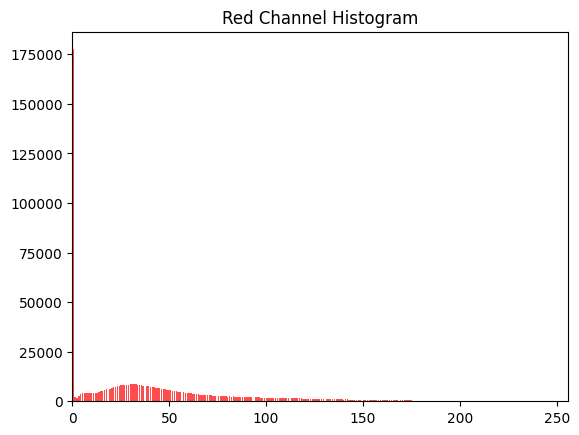

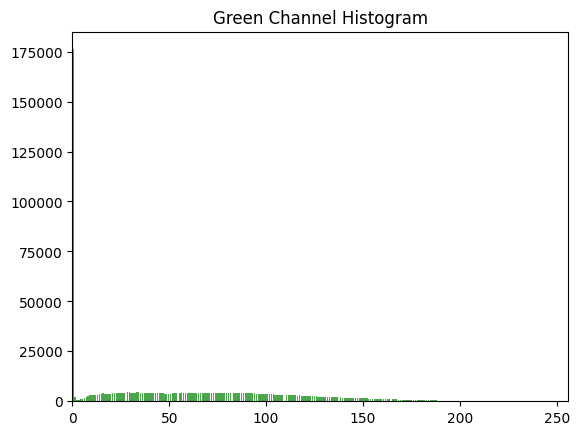

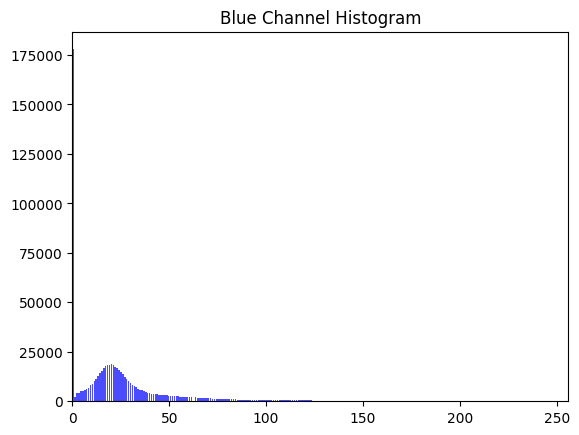

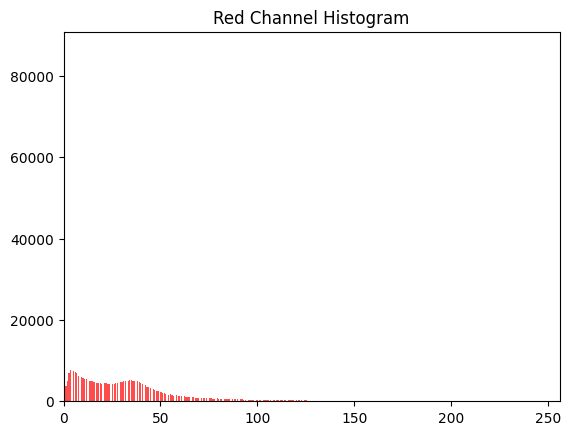

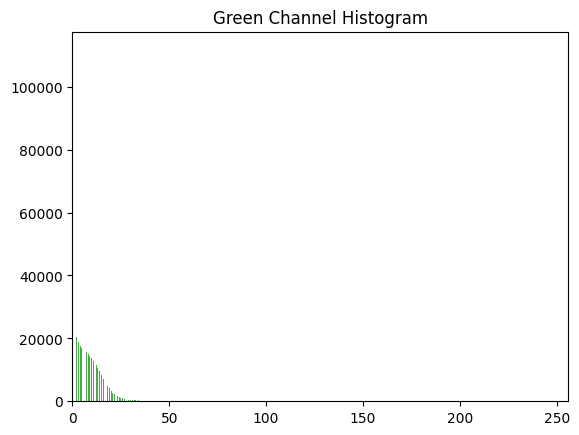

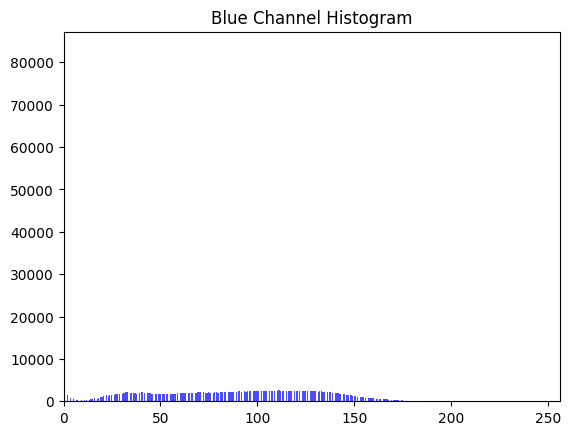

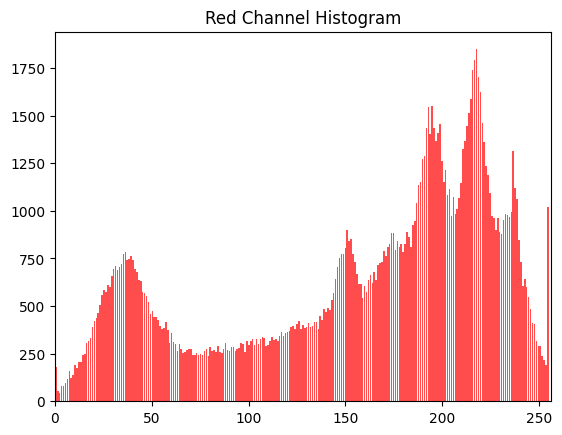

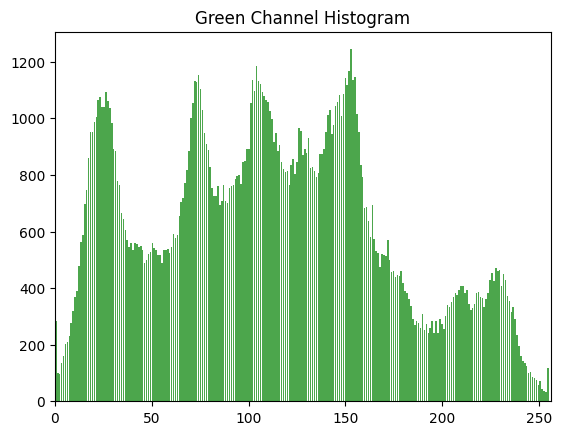

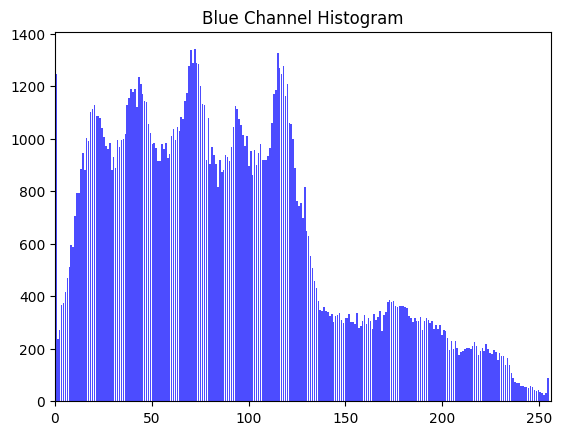

In [58]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.subplot(3,4,1)
plt.imshow(img1RGB);
plt.subplot(3,4,4*1+1)
plt.imshow(img2RGB);
plt.subplot(3,4,4*2+1)
plt.imshow(img3RGB);
plt.close()

r, g, b = cv2.split(img1RGB)
plt.hist(r.flatten(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.title('Red Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(g.flatten(), bins=256, color='green', alpha=0.7, rwidth=0.8)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(b.flatten(), bins=256, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

r, g, b = cv2.split(img2RGB)

plt.hist(r.flatten(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.title('Red Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(g.flatten(), bins=256, color='green', alpha=0.7, rwidth=0.8)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(b.flatten(), bins=256, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()


r, g, b = cv2.split(img3RGB)

plt.hist(r.flatten(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.title('Red Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(g.flatten(), bins=256, color='green', alpha=0.7, rwidth=0.8)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(b.flatten(), bins=256, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()


2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

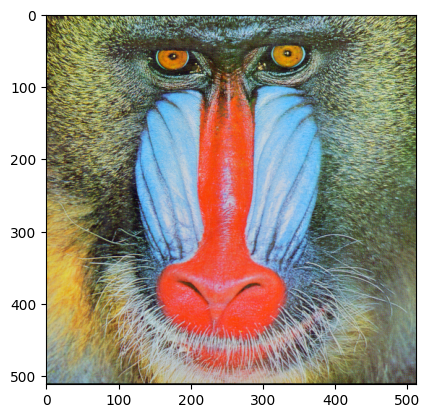

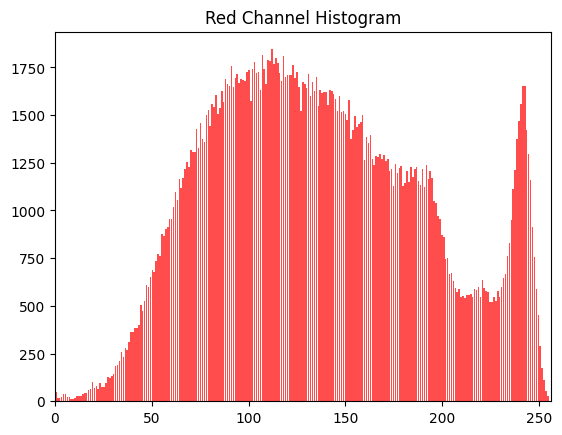

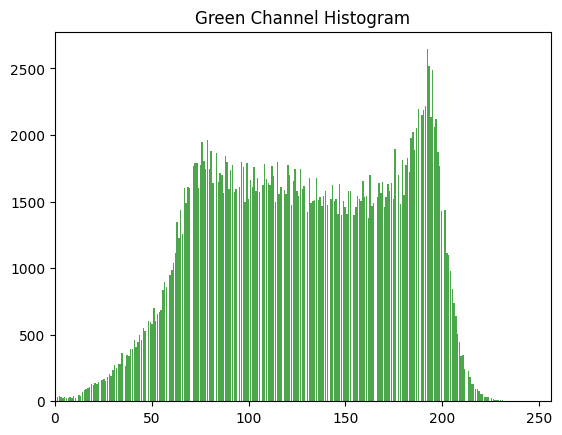

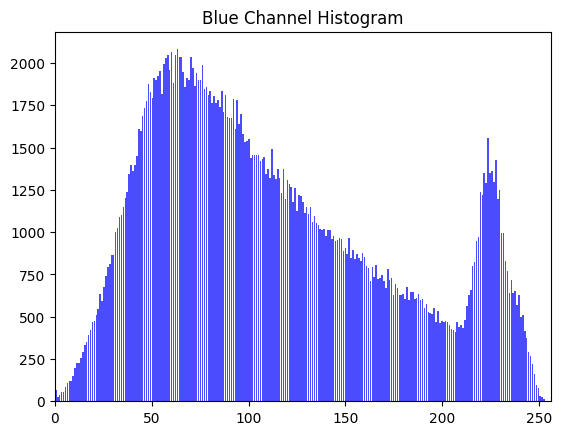

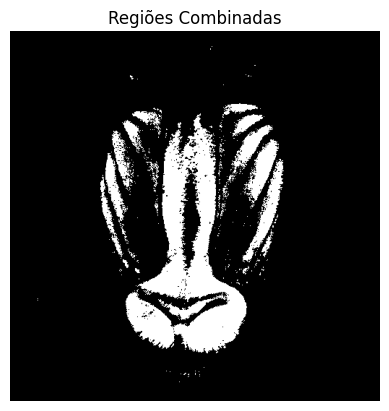

In [29]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)
plt.imshow(img_mand_RGB);
plt.show()
plt.close()

r, g, b = cv2.split(img_mand_RGB)

plt.hist(r.flatten(), bins=256, color='red', alpha=0.7, rwidth=0.8)
plt.title('Red Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(g.flatten(), bins=256, color='green', alpha=0.7, rwidth=0.8)
plt.title('Green Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()
plt.hist(b.flatten(), bins=256, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Blue Channel Histogram')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

_, red_thresh = cv2.threshold(r, 230, 255, cv2.THRESH_BINARY)
_, blue_thresh = cv2.threshold(b, 230, 255, cv2.THRESH_BINARY)

thresh = cv2.bitwise_or(red_thresh, blue_thresh)
plt.imshow(thresh, cmap='gray')
plt.title('Regiões Combinadas')
plt.axis('off')
plt.show()
plt.close()

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

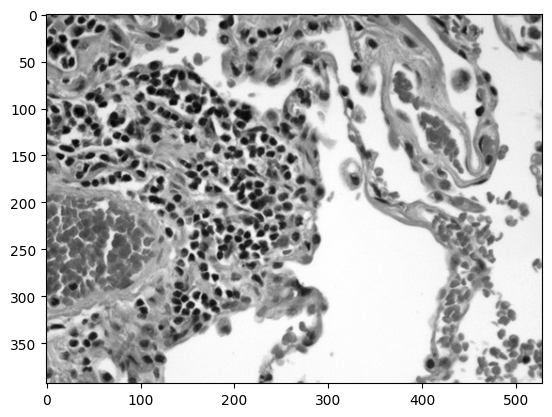

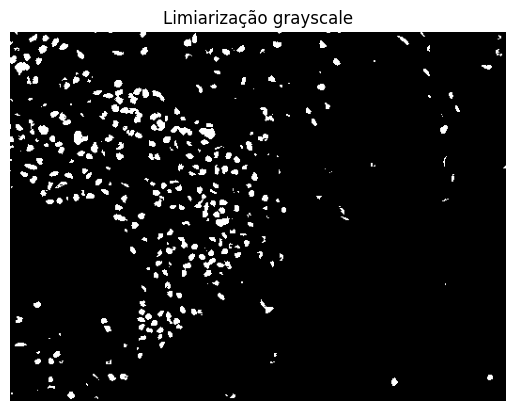

346


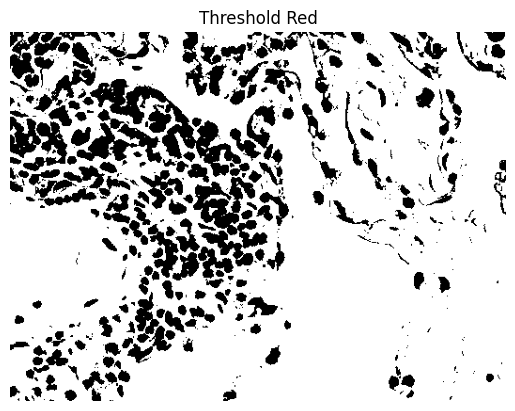

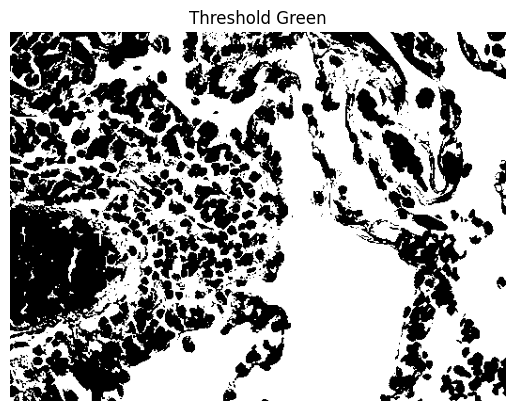

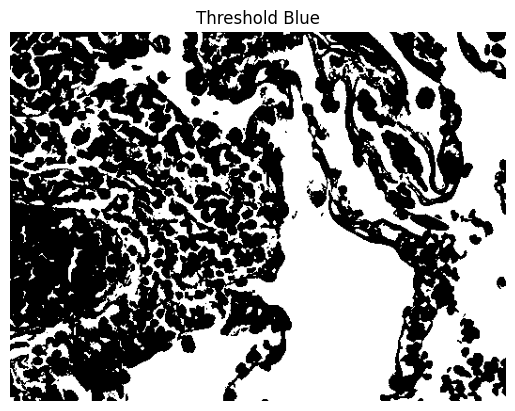

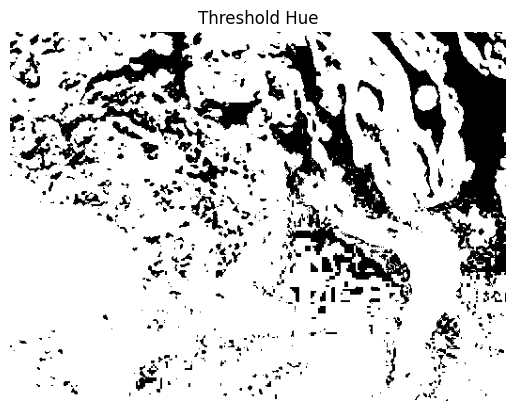

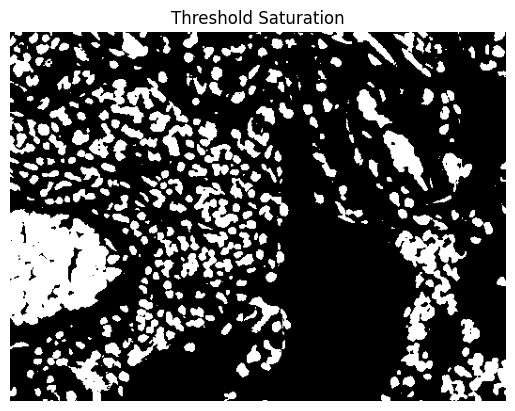

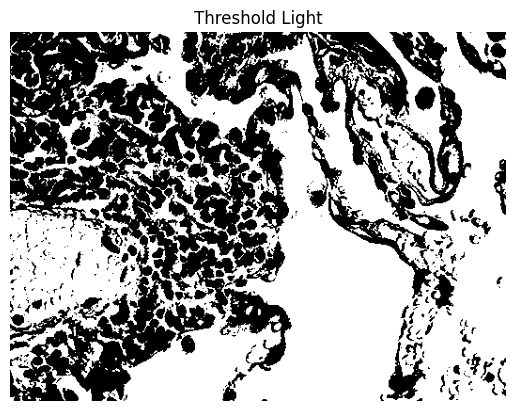

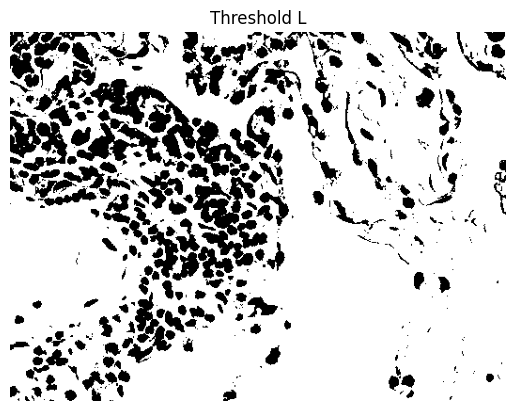

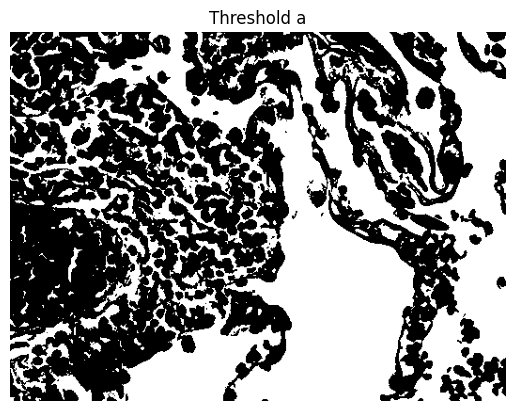

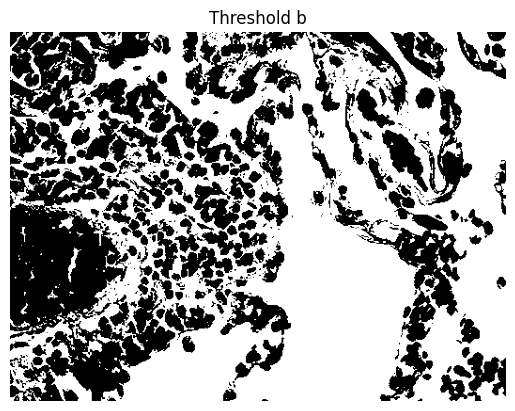

In [8]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
img_he_grayscale = cv2.imread("HE.jpg", 0)
_, gray_thresh = cv2.threshold(img_he_grayscale, 70, 255, cv2.THRESH_BINARY_INV)

plt.imshow(img_he_grayscale, cmap='gray')
plt.show()
plt.close()

plt.imshow(gray_thresh, cmap='gray')
plt.title('Limiarização grayscale')
plt.axis('off')
plt.show()
plt.close()

n_labels, labeled = cv2.connectedComponents(gray_thresh)
print(n_labels)

img_he_rgb = cv2.imread("HE.jpg", 0)

r, g, b = cv2.split(img_he_RGB)
_, red_thresh = cv2.threshold(r, 200, 255, cv2.THRESH_OTSU)
_, blue_thresh = cv2.threshold(g, 200, 255, cv2.THRESH_OTSU)
_, green_thresh = cv2.threshold(b, 200, 255, cv2.THRESH_OTSU)

img_he_HSV = cv2.cvtColor(img_he, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_he_HSV)
_, h_thresh = cv2.threshold(h, 100, 255, cv2.THRESH_OTSU)
_, s_thresh = cv2.threshold(s, 100, 255, cv2.THRESH_OTSU)
_, v_thresh = cv2.threshold(v, 100, 255, cv2.THRESH_OTSU)

img_he_LAB = cv2.cvtColor(img_he, cv2.COLOR_RGB2Lab)
L, a, b = cv2.split(img_he_RGB)

_, l_thresh = cv2.threshold(L, 200, 255, cv2.THRESH_OTSU)
_, a_thresh = cv2.threshold(a, 200, 255, cv2.THRESH_OTSU)
_, b_thresh = cv2.threshold(b, 200, 255, cv2.THRESH_OTSU)

plt.imshow(red_thresh, cmap='gray')
plt.title('Threshold Red')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(green_thresh, cmap='gray')
plt.title('Threshold Green')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(blue_thresh, cmap='gray')
plt.title('Threshold Blue')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(h_thresh, cmap='gray')
plt.title('Threshold Hue')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(s_thresh, cmap='gray')
plt.title('Threshold Saturation')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(v_thresh, cmap='gray')
plt.title('Threshold Light')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(l_thresh, cmap='gray')
plt.title('Threshold L')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(a_thresh, cmap='gray')
plt.title('Threshold a')
plt.axis('off')
plt.show()
plt.close()
plt.imshow(b_thresh, cmap='gray')
plt.title('Threshold b')
plt.axis('off')
plt.show()
plt.close()

print('Foi possível realizar a limiarização com a imagem em tons de cinza, contando 346 componentes conexos')
print('A partir da análise da limiarização de cada canal os canais S e V do modelo HSV, assim como o L do modelo Lab são adequados para o problema ')
